In [ ]:
!pip install anomalib[full]

In [2]:
import numpy as np
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot as plt
from PIL import Image

from anomalib.data import MVTecAD
from anomalib.engine import Engine
from anomalib.models import Fastflow, EfficientAd
from anomalib.utils.post_processing import superimpose_anomaly_map

/usr/local/lib/python3.11/dist-packages/openvino/runtime/__init__.py:10: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


##MVTecAD

In [ ]:
datamodule = MVTecAD(
    # root=dataset_root,
    category="bottle",
    train_batch_size=1,
    eval_batch_size=1,
    num_workers=0,
)

model = EfficientAd()

engine = Engine(
    max_epochs = 10,
    accelerator="auto",  # \<"cpu", "gpu", "tpu", "ipu", "hpu", "auto">,
    devices=1,
    logger=False,
)

engine.fit(model, datamodule=datamodule)

In [ ]:
data_path = "./datasets/MVTecAD/bottle/test/broken_large/000.png"
predictions = engine.predict(model=model, data_path=data_path)
prediction = predictions[0]

In [ ]:
print(
    f"Image Shape: {prediction.image.shape},\n"
    f"Anomaly Map Shape: {prediction.anomaly_map.shape}, \n"
    f"Predicted Mask Shape: {prediction.pred_mask.shape}",
)

Image Shape: torch.Size([1, 3, 256, 256]),
Anomaly Map Shape: torch.Size([1, 256, 256]), 
Predicted Mask Shape: torch.Size([1, 256, 256])


In [ ]:
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

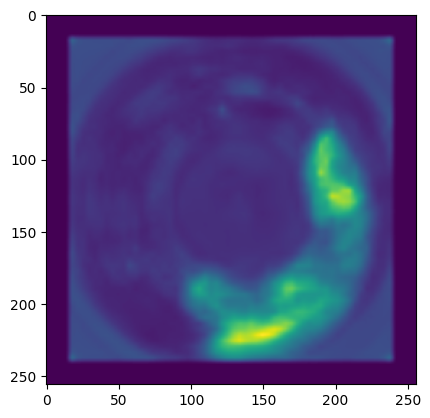

In [ ]:
anomaly_map = prediction.anomaly_map[0]
anomaly_map = anomaly_map.cpu().numpy().squeeze()
plt.imshow(anomaly_map)

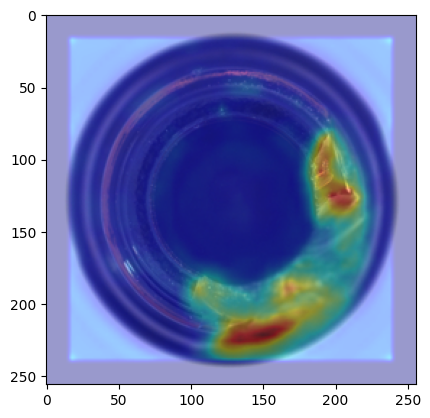

In [ ]:
heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
plt.imshow(heat_map)

In [ ]:
pred_score = prediction.pred_score[0]
pred_labels = prediction.pred_label[0]
print(pred_score, pred_labels)

tensor([0.5112]) tensor(True)


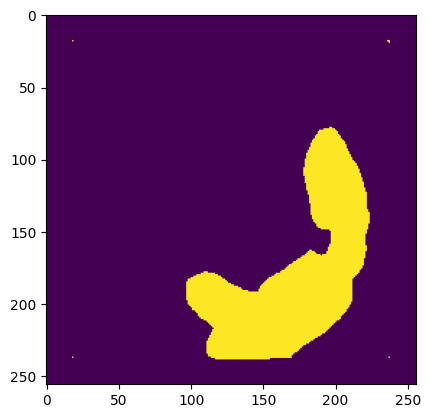

In [ ]:
pred_masks = prediction.pred_mask[0].squeeze().cpu().numpy()
plt.imshow(pred_masks)

##Visa

In [ ]:
from anomalib.data import Visa
# from anomalib.data.utils.transforms import get_transforms

# transform = get_transforms(image_size=256)
datamodule = Visa(
    train_batch_size=1,
    eval_batch_size=1,
)

model = EfficientAd()

engine = Engine(
    max_epochs = 10,
    accelerator="auto",  # \<"cpu", "gpu", "tpu", "ipu", "hpu", "auto">,
    devices=1,
    logger=False,
)

engine.fit(model, datamodule=datamodule)

In [ ]:
test_results = engine.test(model = model, datamodule = datamodule)

In [5]:
test_results

[{'image_AUROC': 0.6336666941642761,
  'image_F1Score': 0.7644787430763245,
  'pixel_AUROC': 0.9297891855239868,
  'pixel_F1Score': 0.2740616798400879}]

In [ ]:
data_path = "./datasets/visa/capsules/Data/Images/Anomaly/000.JPG"
predictions = engine.predict(model=model, data_path=data_path)
prediction = predictions[0]

In [8]:
print(
    f"Image Shape: {prediction.image.shape},\n"
    f"Anomaly Map Shape: {prediction.anomaly_map.shape}, \n"
    f"Predicted Mask Shape: {prediction.pred_mask.shape}",
)

Image Shape: torch.Size([1, 3, 256, 256]),
Anomaly Map Shape: torch.Size([1, 256, 256]), 
Predicted Mask Shape: torch.Size([1, 256, 256])


In [9]:
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

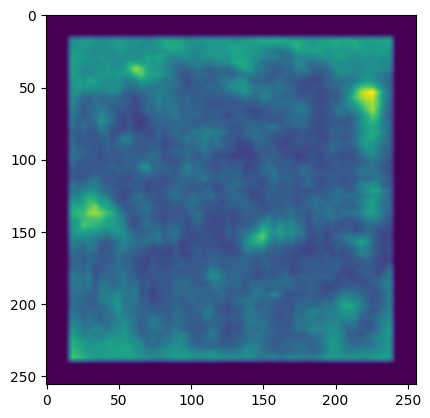

In [10]:
anomaly_map = prediction.anomaly_map[0]
anomaly_map = anomaly_map.cpu().numpy().squeeze()
plt.imshow(anomaly_map)

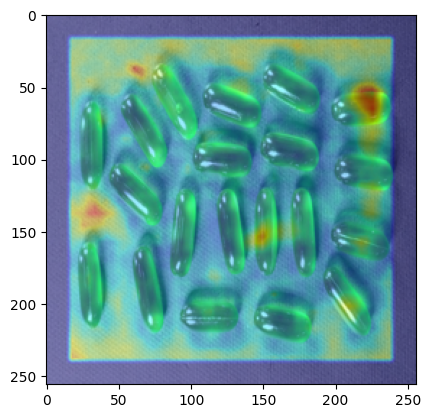

In [11]:
heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
plt.imshow(heat_map)

In [12]:
pred_score = prediction.pred_score[0]
pred_labels = prediction.pred_label[0]
print(pred_score, pred_labels)

tensor([0.5739]) tensor(True)


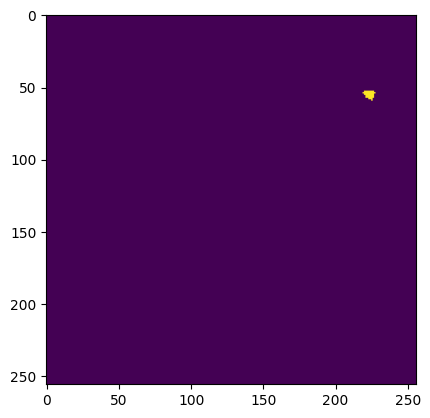

In [13]:
pred_masks = prediction.pred_mask[0].squeeze().cpu().numpy()
plt.imshow(pred_masks)

In [ ]:
data_path = "./datasets/visa/capsules/Data/Images/Anomaly/001.JPG"
predictions = engine.predict(model=model, data_path=data_path)
prediction = predictions[0]

In [15]:
image_path = prediction.image_path[0]
image_size = prediction.image.shape[-2:]
image = np.array(Image.open(image_path).resize(image_size))

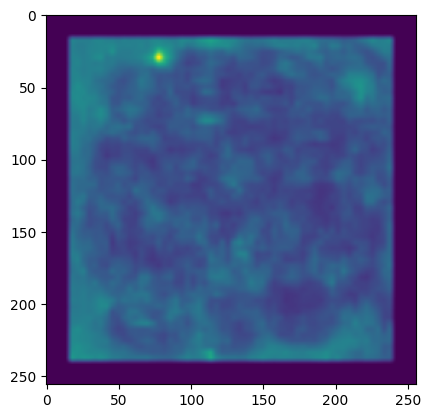

In [16]:
anomaly_map = prediction.anomaly_map[0]
anomaly_map = anomaly_map.cpu().numpy().squeeze()
plt.imshow(anomaly_map)

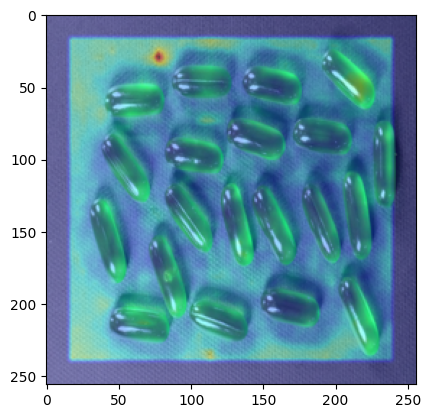

In [17]:
heat_map = superimpose_anomaly_map(anomaly_map=anomaly_map, image=image, normalize=True)
plt.imshow(heat_map)

In [18]:
pred_score = prediction.pred_score[0]
pred_labels = prediction.pred_label[0]
print(pred_score, pred_labels)

tensor([0.6237]) tensor(True)


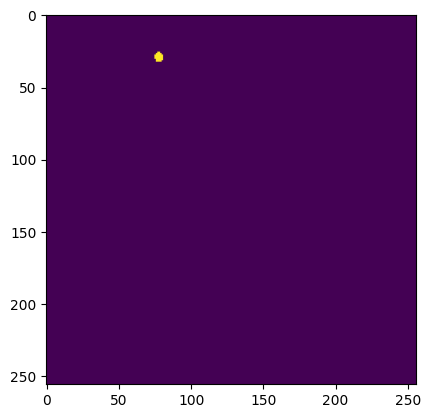

In [19]:
pred_masks = prediction.pred_mask[0].squeeze().cpu().numpy()
plt.imshow(pred_masks)

##MVTecLOCO

In [ ]:
from anomalib.data import MVTecLOCO

datamodule = MVTecLOCO(
    category="breakfast_box",
    train_batch_size=1,
    eval_batch_size=1,
    num_workers=0,
)

model = EfficientAd()

engine = Engine(
    max_epochs = 10,
    accelerator="auto",  # \<"cpu", "gpu", "tpu", "ipu", "hpu", "auto">,
    devices=1,
    logger=False,
)

engine.fit(model, datamodule=datamodule)

In [ ]:
import time

start_time = time.time()
test_result = engine.test(model=model, datamodule = datamodule)
inference_time = time.time() - start_time

In [ ]:
print(f"Inference time: {inference_time} seconds")
print(f"Latency: {inference_time / len(datamodule.test_dataloader().dataset)}")

In [ ]:
test_result